In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
upload = files.upload()

Saving wine.csv to wine.csv


In [ ]:
wines = pd.read_csv('wine.csv')
wines

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
wines.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
wines.shape

(178, 14)

In [ ]:
scalar = StandardScaler()
wines_scale = scalar.fit_transform(wines)
wines_scale

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
pca = PCA(n_components=10)
pca_values = pca.fit_transform(wines_scale)
pca_values

array([[-3.5229339 , -1.45309844, -0.16479549, ...,  0.05563728,
        -0.45876506,  1.06556955],
       [-2.52885806,  0.33001925, -2.02670665, ...,  1.01037189,
         0.21880609, -0.02018203],
       [-2.78502898, -1.03693595,  0.9832377 , ..., -0.26895705,
         1.22276949, -0.10624913],
       ...,
       [ 3.02727243, -2.75604024, -0.94080304, ...,  0.05254455,
        -0.02788135, -0.21274935],
       [ 2.75522166, -2.29378408, -0.55047368, ...,  0.42651198,
         0.04878416,  0.47979317],
       [ 3.49633565, -2.76060799,  1.01315115, ..., -0.32500213,
        -0.7199834 ,  0.07990775]])

In [ ]:
pca_values.shape

(178, 10)

In [ ]:
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615])

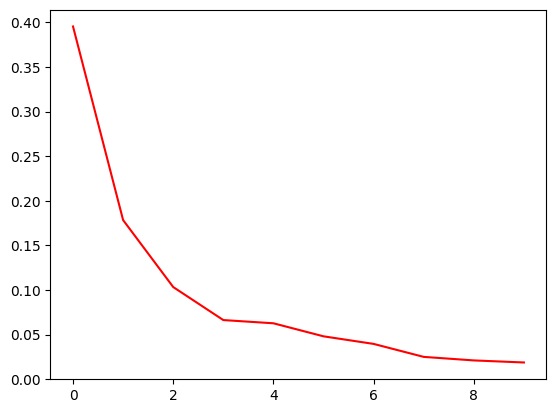

In [ ]:
#variance plot for PCA components obtained
plt.plot(var,color='red')

In [ ]:
#Cumulative variance
var = np.cumsum(np.round(var,decimals = 4)*100)
var

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42, 89.38, 91.88, 93.98,
       95.85])

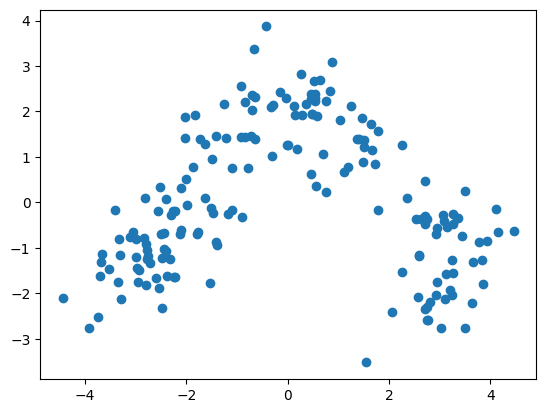

In [ ]:
#plot between PCA1 and PCA2
x = pca_values[:,0]
y = pca_values[:,1]
plt.scatter(x,y)

In [ ]:
finalDF = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['PC1','PC2','PC3']),wines[['Type']]],axis = 1)

In [ ]:
finalDF

,PC1,PC2,PC3,Type
0,-3.522934,-1.453098,-0.164795,1
1,-2.528858,0.330019,-2.026707,1
2,-2.785029,-1.036936,0.983238,1
3,-3.922588,-2.768210,-0.174968,1
4,-1.407511,-0.867773,2.025829,1
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,3
174,2.942729,-1.752263,0.207480,3
175,3.027272,-2.756040,-0.940803,3
176,2.755222,-2.293784,-0.550474,3


<Axes: >

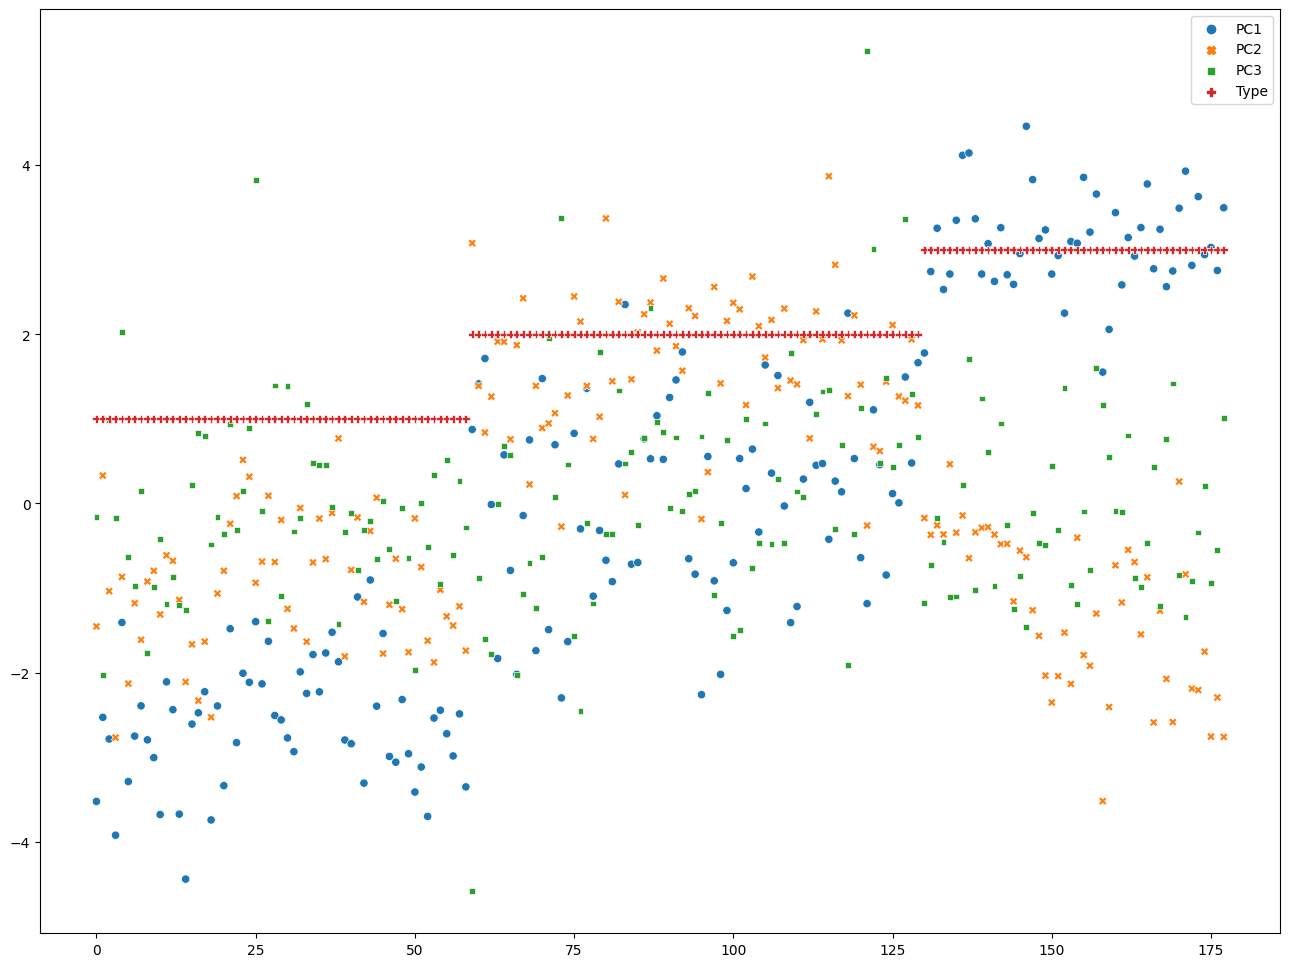

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=finalDF)

## Hierarchical

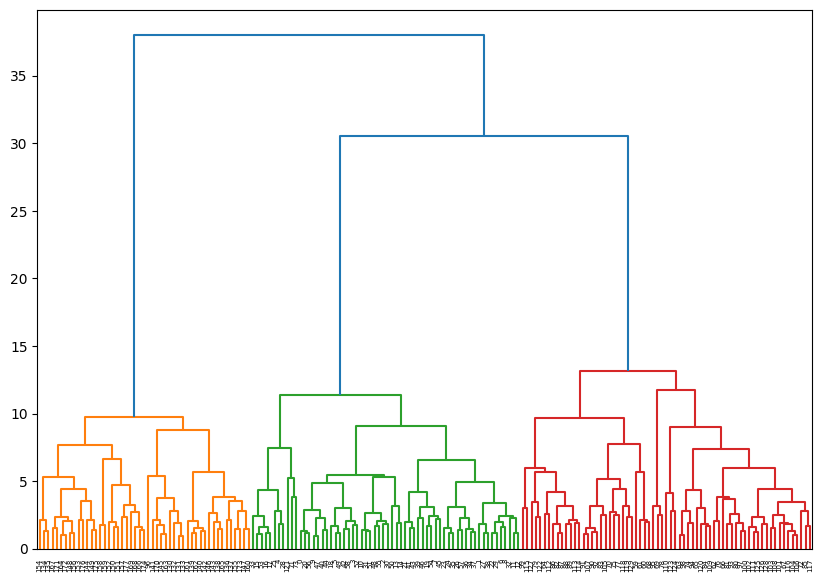

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(pca_values, method='ward'))

In [ ]:
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [ ]:
hclusters = hclusters.fit_predict(pca_values)
hclusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 3, 2,
       2, 2, 3, 4, 3, 0, 2, 0, 2, 3, 2, 3, 4, 3, 2, 2, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 4, 1, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 0, 3, 2, 2, 2, 2, 3, 2, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## KMeans

[2388.4001487789483, 1623.7238507905881, 1182.8025976852082, 1081.4821874335971, 1016.784263737419, 947.229092422469, 899.8444597725286, 849.090221432085, 809.0955864106121, 773.8478617002672]


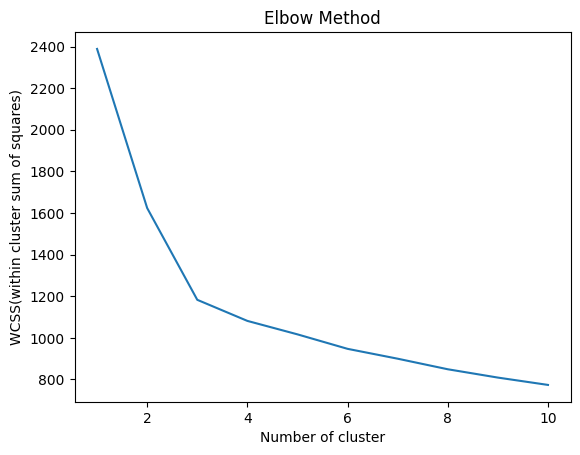

In [ ]:
#WCSS(within cluster sum of square)
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(pca_values)
  wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS(within cluster sum of squares)')
plt.show()

In [ ]:
k_mean_clust = KMeans(3, random_state=0)
k_mean_clust.fit(pca_values)

KMeans(n_clusters=3, random_state=0)

In [ ]:
k_mean_clust.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)